ASSINGMENT:-
Build co-occurrence matrix of different medications and see which medications often occur together.
Visualizethe matrix using heatmap.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Loading the covid19 papers.

meta = pd.read_csv('metadata.csv')
print(meta.shape)
print(meta.columns)

(1000, 19)
Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')


In [25]:
medications = ['hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromicyn',
               'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = ['covid', 'sars', 'pneumonia', 'infection', 'diabetes', 'coronavirus', 'death']

In [23]:
#Creating the matrix

matrix = np.zeros((len(medications), len(diagnosis)))
for n in meta['abstract']:
    z = str(n).lower()
    for i, k in enumerate(medications):
        if ' '+k in z:
            for q, s in enumerate(diagnosis):
                if ' '+s in z:
                    matrix[i,q] += 1
print(matrix)

[[4. 3. 1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [2. 2. 1. 2. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


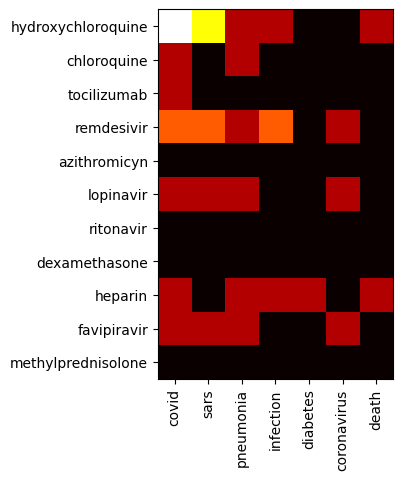

In [24]:
#Visualizing the matrix using heatmap
plt.imshow(matrix,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()